## Import libraries and download the packages

In [1]:
# General Import
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import nltk
import gensim
import string


# Preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist

from gensim.parsing.porter import PorterStemmer
from nltk.stem.snowball import EnglishStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Evaluation
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report, hamming_loss, f1_score

# Misc
from pprint import pprint
from statistics import mean
import warnings
warnings.filterwarnings('ignore')

## Read the dataset

In [2]:
df = pd.read_csv("data/videodata.csv")

In [3]:
df

,Unnamed: 0,Id,Channel,Title,Category,Transcript
0,1,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You..."
1,2,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...
2,3,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,"Entertainment,Comedy",April where have you been over two phone calls...
3,5,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so..."
4,6,YiEj9mrqTN0,A&E,Live PD: Most Viewed Moments from Walton Count...,News,[music playing] We'll be on Laverne Street. It...
...,...,...,...,...,...,...
1584,2510,DonD68byO0o,Parks and Recreation,Best of Andy Dwyer | Parks and Recreation,"Entertainment,Comedy",oh I guess while you get your medicine I'll ju...
1585,2511,iaEcZW0eyEg,Hell's Kitchen,Gordon Ramsay's Most Savage Moments | Hell's K...,Food,southern girl keisha hopes to get the women on...
1586,2512,sW9npZVpiMI,Joma Tech,why you NEED math for programming,"Tech,Comedy",[Music] okay [Music] jesus nope not jesus it's...
1587,2513,yl3MiR7XXAM,jacksepticeye,Happy Wheels - Part 1 | THIS GAME IS MY BITCH,VideoGames,"Top o' the mornin' to ya, laddies! My name i..."


## Data Understanding
Perform the necessary steps and explain the rationale taken here.



<h4> Video Count Per Category </h4>

In [4]:
cat_dict = df.Category.value_counts().to_dict()

Total Video Count: 1589


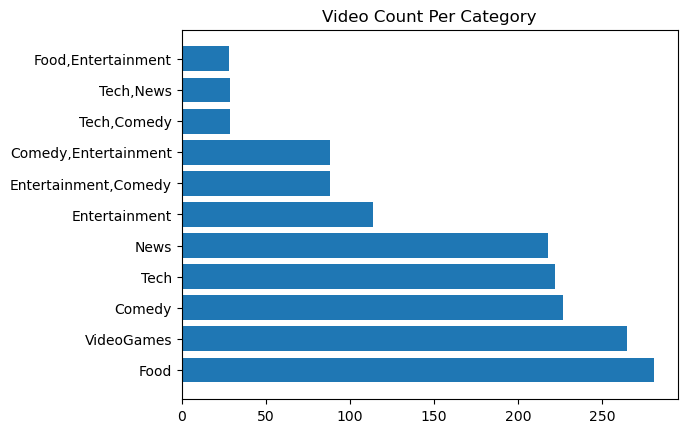

In [5]:
fig, ax = plt.subplots()

ax.barh(list(cat_dict.keys()), list(cat_dict.values()))
ax.set_title("Video Count Per Category")

print("Total Video Count: %s" % sum(list(cat_dict.values())))

<h4> Understanding Cleaning Steps needed </h4>

In [6]:
character_set = set()

In [7]:
_ = [character_set.update(word.lower()) for doc in df["Title"] for word in doc]
_ = [character_set.update(word.lower()) for doc in df["Transcript"] for word in doc]

In [8]:
print(character_set)

{'q', '😱', 'ó', '3', '|', '🇷', '#', '͜', 'ｎ', '𝐃', 'o', 'ｈ', '♪', '̒', '^', '̗', 'u', '♩', '͡', '𝘳', 'ô', 'ｔ', 'ಠ', '🔴', '️', '💪', '́', 'û', '٩', 'e', 'g', '☉', '𝐈', '𝘩', '!', '𝘴', 'ñ', 'ｒ', 'õ', '5', 'ß', 'ë', '̵', '𝘷', '𝘐', '＿', '-', '̶', '❀', '~', '[', '𝘸', '͊', '£', '̄', '𝘰', '𝘱', '人', '○', '𝘕', '\u200c', '𝘢', '🔥', '̍', 'h', '𝘍', '&', '@', 'x', 'ఠ', '“', '̣', ':', ' ', '͖', 'a', '”', '̑', 'è', '◞', '（', 'y', 'ú', '🧻', '𝐒', '𝘈', '}', 'ʖ', '🏁', '_', 'b', '¢', '∅', '𝘞', '𝐇', '⁀', 'ｓ', '✨', 'á', 'é', '̇', '>', 'ｇ', 'j', '•', ']', '◔', '…', '°', '￣', '\r', '𝘛', 'е', 'ε', '𝘵', 'ｖ', 'z', '2', '𝘏', '͂', '¬', ',', '¯', 'ツ', 'ï', '̹', '＼', 'ヾ', 'å', 'ś', '̪', '𝐄', '۶', '"', '½', 'ｉ', '̨', 'í', 'k', 'ą', 'ａ', '𝘔', '𝘥', '6', '𝘬', '𝘊', '͌', '𝘪', 'ｂ', '͛', '`', 'ｗ', '𝘤', '◟', '）', 'c', '𝘮', '𝘨', 'ｐ', 'n', '̬', '𝐍', '/', '𝐓', 'd', '♫', '⚽', '﹏', '*', '–', '̯', '—', '$', '𝐆', '\xa0', '🚗', '‘', 'ｌ', '𝘎', '͍', '%', 't', '4', '͘', '͟', '／', '𝘺', 'ｏ', '・', 'w', '{', '𝘯', '̀', '8', 'ł', '🚁', '◕', '👌', 

In [9]:
no_emoji = [''.join([ch for ch in character_set if ord(ch) < 128])]
print(no_emoji)

['q3|#o^ueg!5-~[h&@x: ay}_b>j]\rz2,"k6`cn/d*$%t4w{8r\n+)fv(\\;i.sp7l90\'m?=1<']


In [10]:
no_punc = [''.join([ch for ch in no_emoji[0].lower() if ch not in string.punctuation])]
print(no_punc)

['q3oueg5hx aybj\rz2k6cndt4w8r\nfvisp7l90m1']


In [11]:
no_space = no_punc[0].replace(" ", '').replace("\r","").replace("\n", "")
print(no_space)

q3oueg5hxaybjz2k6cndt4w8rfvisp7l90m1


In [12]:
no_num = ''.join([ch for ch in no_space.lower() if not ch.isdigit()])
print(no_num)

qoueghxaybjzkcndtwrfvisplm


In [13]:
len(no_num)

26

## Data Preparation
Perform the necessary steps and explain the rationale taken here.



<h4> Basic Tokenizing and Cleaning </h4>

In [14]:
df = pd.read_csv("data/videodata.csv")

In [15]:
df["text"] = df["Title"] + df["Transcript"]
df["text"].replace("\\r\\n", " ", regex = True, inplace = True)

In [16]:
word_exclude = string.punctuation
lemma = WordNetLemmatizer()
stemmer = EnglishStemmer()
stopwords_english = set(stopwords.words('english'))

def clean(doc):
    cleaned_word = []
    for word in doc:
        emoji_free = ''.join([ch for ch in word if ord(ch) < 128]) # Remove Emojis and unicode characters
        punc_free = ''.join([ch for ch in emoji_free.lower() if ch not in word_exclude]) # Remove Punctuations
        stop_free = ' '.join([i for i in punc_free.split() if i not in stopwords_english]) # Remove common stopwords
        # normalized = ' '.join(lemma.lemmatize(word) for word in stop_free.split()) # Lemmatize each word
        stemmed = ' '.join(stemmer.stem(word) for word in stop_free.split()) # Stem each word
        num_free = ''.join([ch for ch in stemmed.lower() if not ch.isdigit()]) # Remove number
        if num_free != "":
            cleaned_word.append(num_free)
    return cleaned_word

In [17]:
df['text'] = df['text'].apply(lambda x: word_tokenize(x))
df['text'] = df['text'].apply(lambda x: clean(x))  

<h4> Updating Common Word Via Freq Distribution </h4>

In [18]:
def plot_frequency(freq):
    plt.figure(figsize=(10,5))
    freq.plot(50, cumulative=False)
    plt.show()

In [19]:
all_word_cleaned = [word for doc in df.text for word in doc]
all_word_cleaned_freq = FreqDist(all_word_cleaned) 

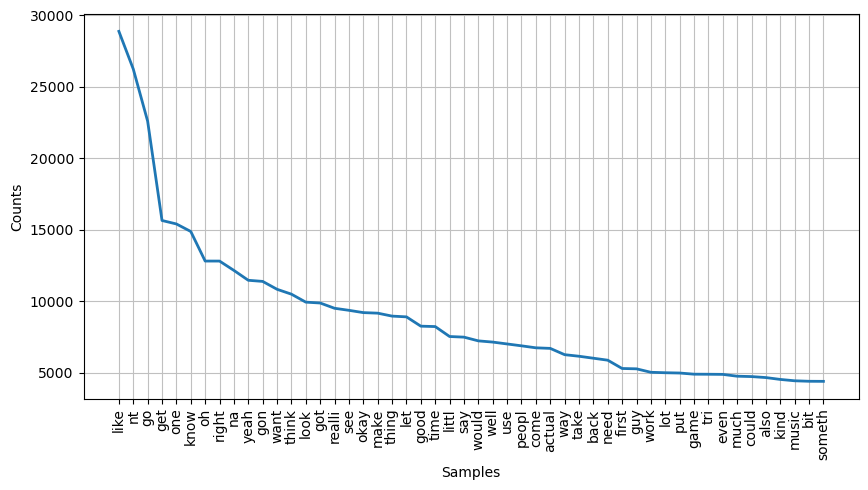

In [20]:
plot_frequency(all_word_cleaned_freq)

In [21]:
stopwords_english.update(["like", "nt", "go", "get", "know"])
df['text'] = df['text'].apply(lambda x: clean(x))

In [22]:
df_cleaned = df.copy()[["text","Category"]]
df_cleaned

,text,Category
0,"[pizza, hut, stuf, crust, pizza, fanci, fast, ...",Food
1,"[icon, pizza, slice, nyc, street, food, iconsi...",Food
2,"[ron, swanson, papa, pawn, park, recreationapr...","Entertainment,Comedy"
3,"[doctor, defeat, abzorbaloff, love, monster, d...",Entertainment
4,"[live, pd, view, moment, walton, counti, fl, e...",News
...,...,...
1584,"[best, andi, dwyer, park, recreationoh, guess,...","Entertainment,Comedy"
1585,"[gordon, ramsay, savag, moment, hell, kitchen,...",Food
1586,"[need, math, program, music, okay, music, jesu...","Tech,Comedy"
1587,"[happi, wheel, part, game, bitch, top, mornin,...",VideoGames


<h4> Feature Set </h4>

In [23]:
all_word_cleaned = [word for doc in df_cleaned.text for word in doc]
all_word_cleaned_freq = FreqDist(all_word_cleaned) 

most_common_words = all_word_cleaned_freq.most_common(500)

print ("Top Ten Most Common Words %s " % most_common_words[:10])
print ("Top Ten Least Common Words %s " % most_common_words[-10:])

word_features = [item[0] for item in most_common_words]

Top Ten Most Common Words [('one', 15407), ('oh', 12811), ('right', 12810), ('na', 12156), ('yeah', 11465), ('gon', 11387), ('want', 10836), ('think', 10493), ('look', 9935), ('got', 9875)] 
Top Ten Least Common Words [('whoa', 580), ('figur', 579), ('delici', 579), ('subscrib', 578), ('option', 576), ('price', 575), ('air', 574), ('send', 574), ('surpri', 573), ('youtub', 573)] 


In [24]:
def document_features(df, stemmed_tokens):
    doc_features = []
    for index, row in df.iterrows():
        features = {}
        for word in word_features:
            # get term occurence: true if it's in the word_features, false if it's not
            features[word] = (word in row[stemmed_tokens])
        doc_features.append(features)
    return doc_features

feature_set = pd.DataFrame(document_features(df_cleaned, 'text'), index = df_cleaned.index)
feature_set.head()

,one,oh,right,na,yeah,gon,want,think,look,got,...,whoa,figur,delici,subscrib,option,price,air,send,surpri,youtub
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,False,True,False,False,False,False
1,True,False,True,True,True,True,True,True,True,True,...,False,True,False,False,False,True,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,False,True,False,False,False,False,False,False,False
3,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False


<h4> BOW Set </h4>

In [25]:
df_cleaned["Processed_text"] = df_cleaned["text"].apply(lambda x: " ".join(x))
df_cleaned.head()

,text,Category,Processed_text
0,"[pizza, hut, stuf, crust, pizza, fanci, fast, ...",Food,pizza hut stuf crust pizza fanci fast food myt...
1,"[icon, pizza, slice, nyc, street, food, iconsi...",Food,icon pizza slice nyc street food iconsif want ...
2,"[ron, swanson, papa, pawn, park, recreationapr...","Entertainment,Comedy",ron swanson papa pawn park recreationapril two...
3,"[doctor, defeat, abzorbaloff, love, monster, d...",Entertainment,doctor defeat abzorbaloff love monster doctor ...
4,"[live, pd, view, moment, walton, counti, fl, e...",News,live pd view moment walton counti fl e music p...


In [26]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
count_wm = countvectorizer.fit_transform(df_cleaned["Processed_text"])
bow_features = pd.DataFrame(data = count_wm.toarray(),columns = countvectorizer.get_feature_names_out())
bow_features.head()

,aa,aaa,aaaa,aaaaaaa,aaaaaaaa,aaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaah,...,zumba,zurkon,zushi,zuzu,zygon,zzt,zzzzzzz,zzzzzzzzz,zzzzzzzzzz,zzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# import gensim
# from gensim import corpora

# # Build the dictionary
# mydict = corpora.Dictionary(df_cleaned['text'])
# vocab_len = len(mydict)

# def get_bow_features(df, stemmed_tokens):
#     test_features = []
#     for index, row in df.iterrows():
#         # Converting the tokens into the format that the model requires
#         features = gensim.matutils.corpus2csc([mydict.doc2bow(row[stemmed_tokens])],num_terms=vocab_len).toarray()[:,0]
#         test_features.append(features)
#     return test_features

# header = ",".join(str(mydict[ele]) for ele in range(vocab_len))

# bow_features = pd.DataFrame(get_bow_features(df_cleaned, 'text'),                            
#                             columns=header.split(','), index = df_cleaned.index)
# bow_features.head()

<h4> TFIDF Set </h4>

In [28]:
tfidfvectorizer = TfidfVectorizer(analyzer='word' , stop_words='english')
tfidf_term_vectors = tfidfvectorizer.fit_transform(df_cleaned["Processed_text"])
tfidf_features = pd.DataFrame(data = tfidf_term_vectors.toarray(),columns = tfidfvectorizer.get_feature_names_out())
tfidf_features.head()

,aa,aaa,aaaa,aaaaaaa,aaaaaaaa,aaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaah,...,zumba,zurkon,zushi,zuzu,zygon,zzt,zzzzzzz,zzzzzzzzz,zzzzzzzzzz,zzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# import gensim
# from gensim import corpora
# from gensim.models import TfidfModel

# # Build the dictionary
# mydict = corpora.Dictionary(df_cleaned['text'])
# vocab_len = len(mydict)
# corpus = [mydict.doc2bow(line) for line in df_cleaned['text']]
# tfidf_model = TfidfModel(corpus)

# def get_tfidf_features(df, stemmed_tokens):
#     test_features_tfidf = []
#     for index, row in df.iterrows():
#         doc = mydict.doc2bow(row[stemmed_tokens])
#         # Converting the tokens into the formet that the model requires
#         features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
#         test_features_tfidf.append(features)
#     return test_features_tfidf

# header = ",".join(str(mydict[ele]) for ele in range(vocab_len))

# tfidf_features = pd.DataFrame(get_tfidf_features(df_cleaned, 'text'),                            
#                             columns=header.split(','), index = df_cleaned.index)
# tfidf_features.head()

<h4> Transforming Y Label </h4>

In [30]:
from sklearn.preprocessing import MultiLabelBinarizer
y = df_cleaned["Category"].apply(lambda x: x.split(sep=','))

In [31]:
mlb = MultiLabelBinarizer()
y = pd.DataFrame(mlb.fit_transform(y),columns=mlb.classes_, index=df_cleaned.index)
y.head()

,Comedy,Entertainment,Food,News,Tech,VideoGames
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,1,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


## Modelling
Perform the necessary steps and explain the rationale taken here.



In [32]:
# Multilabel Transformers
from skmultilearn.problem_transform import ClassifierChain #Take in account relation between labels#
from skmultilearn.problem_transform import BinaryRelevance #Convert to binary output per label#
from skmultilearn.problem_transform import LabelPowerset #Convert to binary output per label combination#

# Models
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Train Test Split
from sklearn.model_selection import train_test_split

In [33]:
def modelTester(model, transformer, X, y, n=5):
    f1_scores = []
    hamming_losses = []
    
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.2,stratify=y)

        classifer = transformer(model)
        classifer.fit(X_train, y_train)

        y_pred = classifer.predict(X_test).toarray()

        f1_scores.append(f1_score(y_test, y_pred, average="weighted"))
        hamming_losses.append(hamming_loss(y_test, y_pred))
        
    metricList = []
    metricList.append(mean(f1_scores))
    metricList.append(mean(hamming_losses))
    
    return metricList

In [34]:
modelList = [RandomForestClassifier(n_jobs=-1, random_state=42), MLPClassifier(early_stopping=True,random_state=42), RidgeClassifier(random_state=42), MultinomialNB()]
transformerList = [ClassifierChain, BinaryRelevance, LabelPowerset]
datasets = [feature_set, bow_features, tfidf_features]

modelNames = "Random Forest,MLPClassifer,RidgeClassifier,MultinomialNB".split(sep=",")
transformerNames = "ClassiferChain,BinaryRelevance,LabelPowerset".split(sep=",")
datasetNames = "FeatureSet,BOW,TFIDF".split(sep=",")

In [35]:
results = {}

# Making Result Template
for dataset in datasetNames:
    tmp_dict = {}
    for transformer in transformerNames:
        tmp_dict2 = {}
        for model in modelNames:
            tmp_dict2[model] = []
        tmp_dict[transformer] = tmp_dict2
    results[dataset] = tmp_dict

In [36]:
import time
st = time.time()

In [37]:
for d_i, dataset in enumerate(datasets):
    print("Starting with modelling on %s" % datasetNames[d_i])
    for t_i, transformer in enumerate(transformerList):
        for m_i, model in enumerate(modelList):
            results[datasetNames[d_i]][transformerNames[t_i]][modelNames[m_i]] = modelTester(model, transformer, dataset, y)
    print("Done with modelling on %s" % datasetNames[d_i])
    print("")

Starting with modelling on FeatureSet
Done with modelling on FeatureSet

Starting with modelling on BOW
Done with modelling on BOW

Starting with modelling on TFIDF
Done with modelling on TFIDF



In [38]:
et = time.time()

In [39]:
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 2949.9805953502655 seconds


## Evaluation
Perform the necessary steps and explain the rationale taken here.



In [40]:
feature_set_result = results["FeatureSet"]
bow_result = results["BOW"]
tfidf_result = results["TFIDF"]

<h4> Functions to get Result Plots </h4>

In [41]:
def get_model_results(dataset_result, n):
    mlp_results = []
    mnb_results = []
    rforest_results = [] 
    ridge_results = []

    for transformer_res in dataset_result.values():
        mlp_results.append(transformer_res["MLPClassifer"][n])
        mnb_results.append(transformer_res["MultinomialNB"][n])
        rforest_results.append(transformer_res["Random Forest"][n])
        ridge_results.append(transformer_res["RidgeClassifier"][n])
        
    return mlp_results, mnb_results, rforest_results, ridge_results

In [42]:
def getTopModel(datasetName, dataset_result):
    top3 = [[]]*3
    first, second, third = 0, 0, 0

    for transformer,transformer_res in dataset_result.items():
        for model, model_res in transformer_res.items():
            trans_model = [transformer, model]
            if model_res[0] > first:
                first = model_res[0]
                top3.insert(0, trans_model)
                top3.pop()
            elif model_res[0] > second:
                second = model_res[0]
                top3.insert(1, trans_model)
                top3.pop()
            else:
                third = model_res[0]
                top3[-1] = trans_model
    print("Top 3 Models for %s" % datasetName)
    print()
    for trans_model in top3:
        scores = dataset_result[trans_model[0]][trans_model[1]]
        print("%s Weighted F1 Score: %.5f, Hamming Loss: %.5f" % ("-".join(trans_model), scores[0], scores[1]))
        print()

In [43]:
def plotModelData(datasetName, dataset):
    plt.rcParams['figure.figsize'] = [10, 5]
    
    # Data for the chart
    x = list(feature_set_result.keys())
    ind = np.arange(len(x)) 
    width = 0.2


    plt.subplot(1, 2, 1)
    mlp_results,mnb_results,rforest_results,ridge_results = get_model_results(dataset,0)

    # Plot the data
    plt.bar(ind, mlp_results, width, label='MLPClassifer')
    plt.bar(ind+width, mnb_results, width, label='MultinomialNB')
    plt.bar(ind+width*2, rforest_results, width, label='Random Forest')
    plt.bar(ind+width*3, ridge_results, width, label='RidgeClassifier')

    plt.ylim([0, 1])
    plt.xticks(ind+width*1.5,x)
    plt.title("%s - Weighted F1 Score" % datasetName)

    plt.subplot(1, 2, 2)
    mlp_results,mnb_results,rforest_results,ridge_results = get_model_results(dataset,1)

    # Plot the data
    plt.bar(ind, mlp_results, width, label='MLPClassifer')
    plt.bar(ind+width, mnb_results, width, label='MultinomialNB')
    plt.bar(ind+width*2, rforest_results, width, label='Random Forest')
    plt.bar(ind+width*3, ridge_results, width, label='RidgeClassifier')
    
    plt.ylim([0, 1])
    plt.xticks(ind+width*1.5,x)

    plt.title("%s - Hamming Loss" % datasetName)

    # Add a legend and title
    plt.legend(fontsize="8")

    getTopModel(datasetName, dataset)
    
    # Show the plot
    plt.show()

<h4> Graphs </h4>

Top 3 Models for Feature Set

LabelPowerset-MLPClassifer Weighted F1 Score: 0.81256, Hamming Loss: 0.07191

LabelPowerset-MultinomialNB Weighted F1 Score: 0.78968, Hamming Loss: 0.08438

LabelPowerset-RidgeClassifier Weighted F1 Score: 0.75253, Hamming Loss: 0.09518



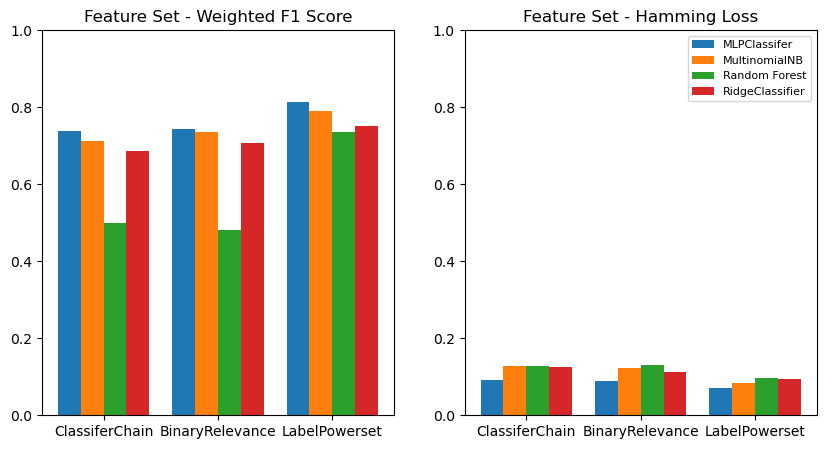

In [44]:
plotModelData("Feature Set", feature_set_result)

Top 3 Models for BOW

LabelPowerset-MLPClassifer Weighted F1 Score: 0.88160, Hamming Loss: 0.04560

ClassiferChain-MLPClassifer Weighted F1 Score: 0.87224, Hamming Loss: 0.04665

LabelPowerset-MultinomialNB Weighted F1 Score: 0.81535, Hamming Loss: 0.06792



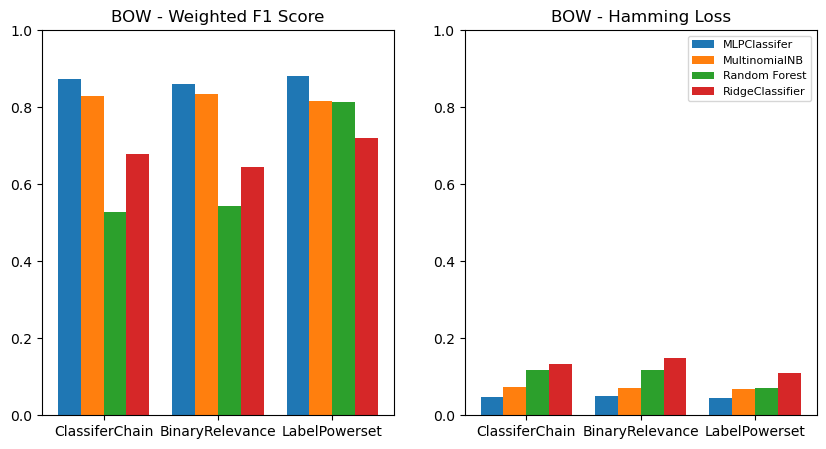

In [45]:
plotModelData("BOW", bow_result)

Top 3 Models for TFIDF

LabelPowerset-RidgeClassifier Weighted F1 Score: 0.91927, Hamming Loss: 0.03113

LabelPowerset-MLPClassifer Weighted F1 Score: 0.88730, Hamming Loss: 0.04287

LabelPowerset-MultinomialNB Weighted F1 Score: 0.57550, Hamming Loss: 0.13826



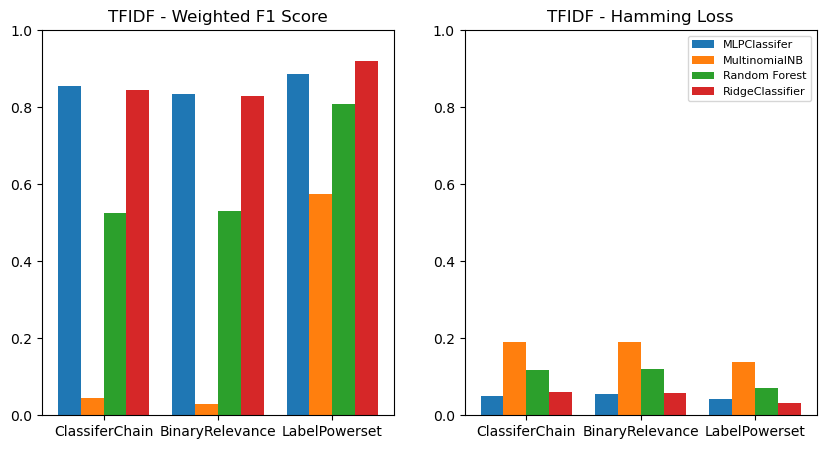

In [46]:
plotModelData("TFIDF", tfidf_result)

From the graph and top 3 for each dataset above, i will take the LabelPower-RidgeClassifer using the tfidf dataset to:
1. Test out Different Hyperparameters
2. Make Function to predict category from title and transcipt

In [47]:
base_ridge = RidgeClassifier()
lp_ridge = LabelPowerset(base_ridge)

In [48]:
lp_ridge.get_params()

{'classifier': RidgeClassifier(),
 'classifier__alpha': 1.0,
 'classifier__class_weight': None,
 'classifier__copy_X': True,
 'classifier__fit_intercept': True,
 'classifier__max_iter': None,
 'classifier__normalize': 'deprecated',
 'classifier__positive': False,
 'classifier__random_state': None,
 'classifier__solver': 'auto',
 'classifier__tol': 0.001,
 'require_dense': [True, True]}

In [49]:
# grid = {
#     "classifier__alpha" : np.arange(0,1.1,0.1),
#     "classifier__class_weight" : [None, "balanced"],
#     "classifier__solver" : ["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"],
#     "classifier__random_state" : [42],
# }

In [50]:
grid = {
    "classifier__alpha" : np.arange(0,1.1,0.1),
    "classifier__class_weight" : [None, "balanced"],
    "classifier__random_state" : [42],
}

In [51]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, y, test_size=0.2,stratify=y)

clf = GridSearchCV(lp_ridge, grid, scoring="f1_weighted", n_jobs=-1)

In [52]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=LabelPowerset(classifier=RidgeClassifier(),
                                     require_dense=[True, True]),
             n_jobs=-1,
             param_grid={'classifier__alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__random_state': [42]},
             scoring='f1_weighted')

In [53]:
clf.best_params_

{'classifier__alpha': 0.30000000000000004,
 'classifier__class_weight': 'balanced',
 'classifier__random_state': 42}

In [54]:
y_pred = clf.best_estimator_.predict(X_test)

<h4> Deeper Evaluation of Model </h4>

Confusion Matrix

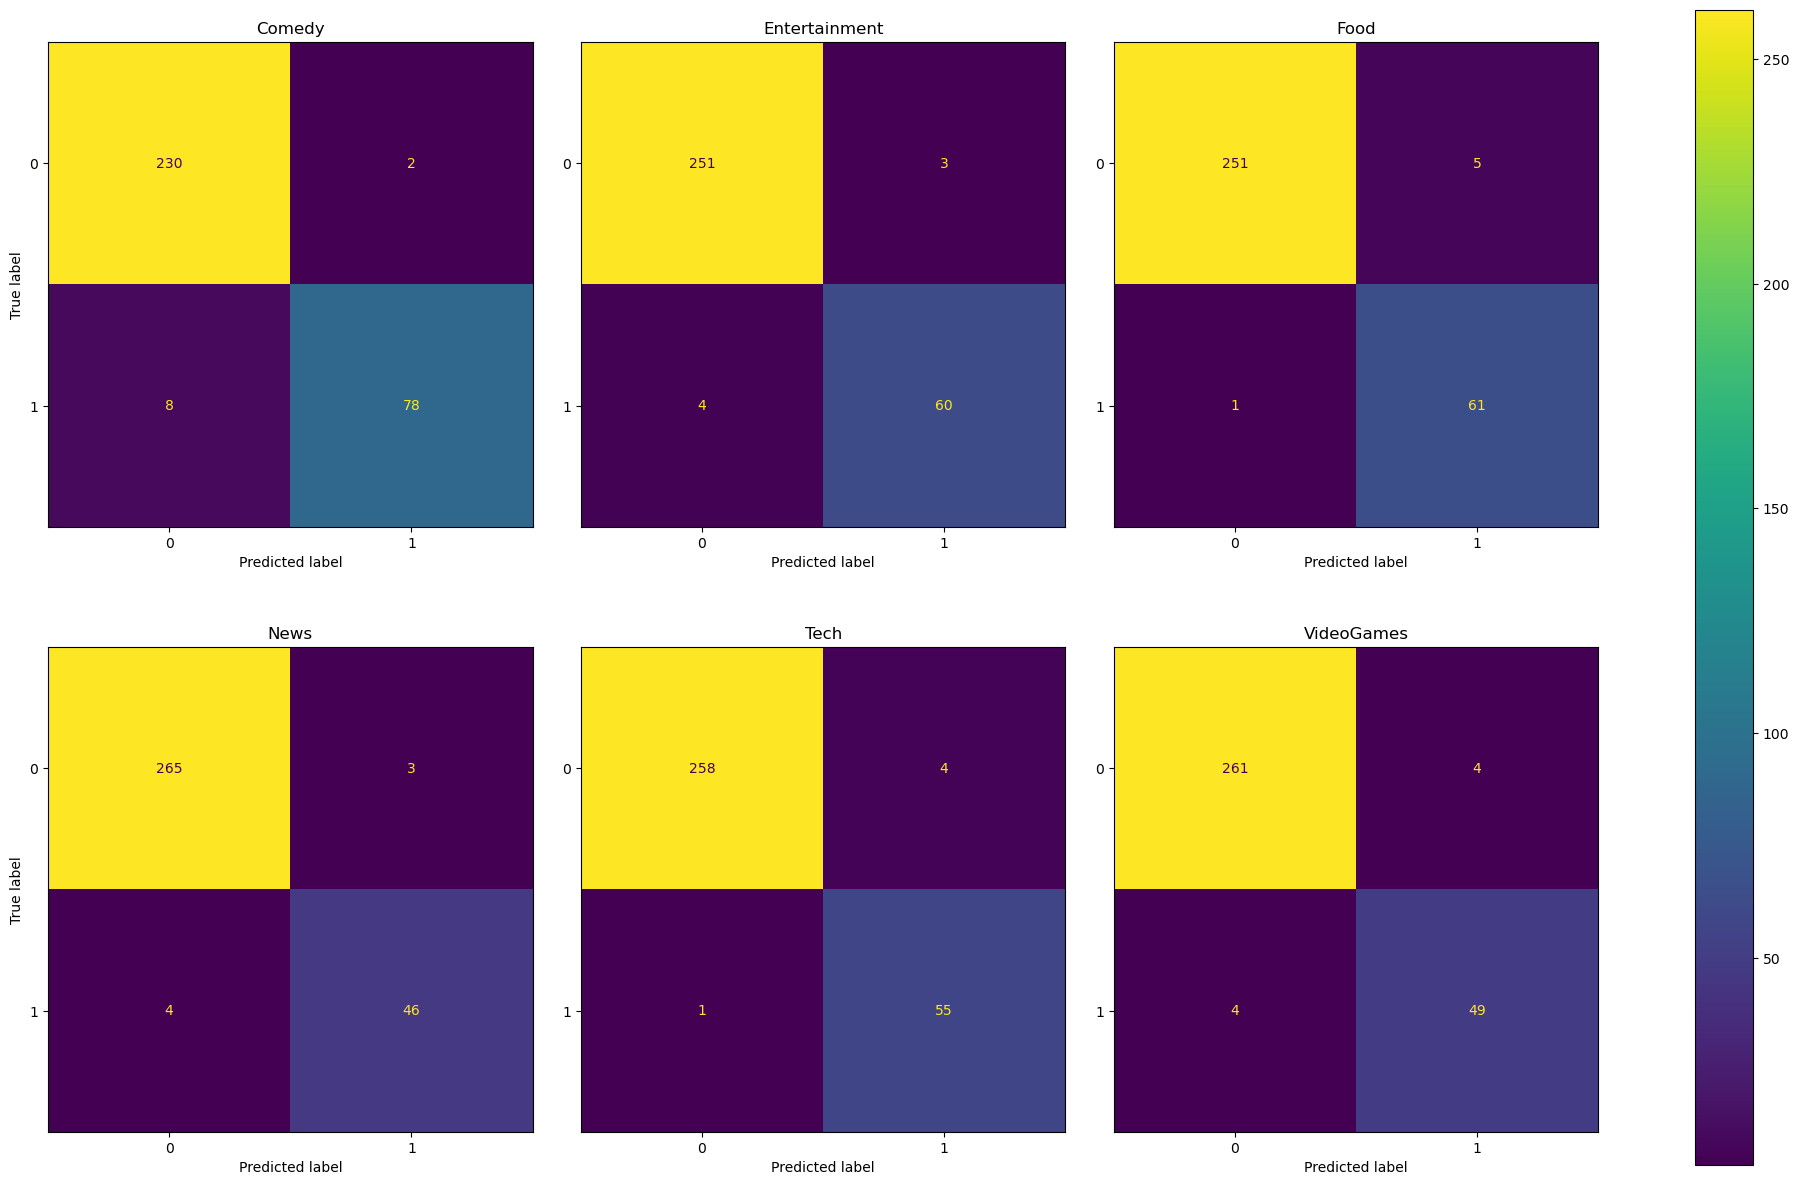

In [55]:
ml_cm = multilabel_confusion_matrix(y_test, y_pred)

cat_names = y.columns.to_list()

f, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.ravel()
for i in range(6):
    disp = ConfusionMatrixDisplay(ml_cm[i])
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(cat_names[i])
    if i<0:
        disp.ax_.set_xlabel('')
    if i%3!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

Weighted F1 Score

In [56]:
f1_score(y_test, y_pred, average="weighted")

0.9418203016422276

Classification Report

In [57]:
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

               precision    recall  f1-score   support

       Comedy       0.97      0.91      0.94        86
Entertainment       0.95      0.94      0.94        64
         Food       0.92      0.98      0.95        62
         News       0.94      0.92      0.93        50
         Tech       0.93      0.98      0.96        56
   VideoGames       0.92      0.92      0.92        53

    micro avg       0.94      0.94      0.94       371
    macro avg       0.94      0.94      0.94       371
 weighted avg       0.94      0.94      0.94       371
  samples avg       0.94      0.94      0.94       371



<h4> Testing Classifer</h4>

In [64]:
# Selecting Random Col from cleaned dataframe
from random import randint
selected = df_cleaned.loc[randint(0,len(df_cleaned))]
print(selected.Category)
print(selected.Processed_text)

Comedy,Entertainment
make strangler offic usyou gon na work excit new startup year georg howard skub aka alleg scranton strangler prison someth may done sorri uh scranton scranton strangler georg howard skub told juri coupl year ago oh happen mean ca talk obvious ca mean could could talk see next christama sure uh seat would start begin think need farther realli offic air qualiti test radon come asbesto ceil silent killer silent killer back annex see decid give babi halpert newspap day born frame set back bone decid take sweet time switch today paper move ca well think could counter move scranton strangler profess strangler oh plea wish come would camera dwight shrute stop late real scranton strangler strangl strangler caught sound someon realli tri convinc us scranton strangler chicken scranton strangler next secretari schrute read minut sunday meet minut previous meet knight night jim hey meet knight night knight night volunt crime patrol often compar guardian angel could differ seri

In [65]:
x_input = tfidfvectorizer.transform([selected.Processed_text]).toarray()

In [66]:
y_predicted = clf.best_estimator_.predict(x_input).toarray()
mlb.inverse_transform(y_predicted)

[('Comedy', 'Entertainment')]